Welcome to my Credit Score Classification python notebook! 

In this notebook, I demonstrate my skills in building and evaluating machine learning models to classify credit scores. The goal of this project is to build a model that can accurately predict the credit score of an individual based on their financial history and personal information. 

This project is a crucial component of my portfolio as it showcases my ability to work with real-world data, perform data cleaning and pre-processing, and apply machine learning algorithms to solve a practical problem. So, sit back, relax and follow along as I guide you through the process of building a credit score classification model.

In [31]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#importing the credit classification dataset
df = pd.read_csv('datasets/train_credit_classification.csv')

In [33]:
#taking a look at the number of rows and columns
df.shape

(100000, 28)

In [34]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [37]:
#checking if there are any null values
df.isnull().sum().sum()

0

In [38]:
#since 'Credit_Score' is out target column, let's see the unique values there and what percentage each of them contributes 
df['Credit_Score'].value_counts(normalize=True) * 100

Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

Let's explore the rlationship between our target column (Credit_Score) and the features.

In [39]:
#let's get a list of all the columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

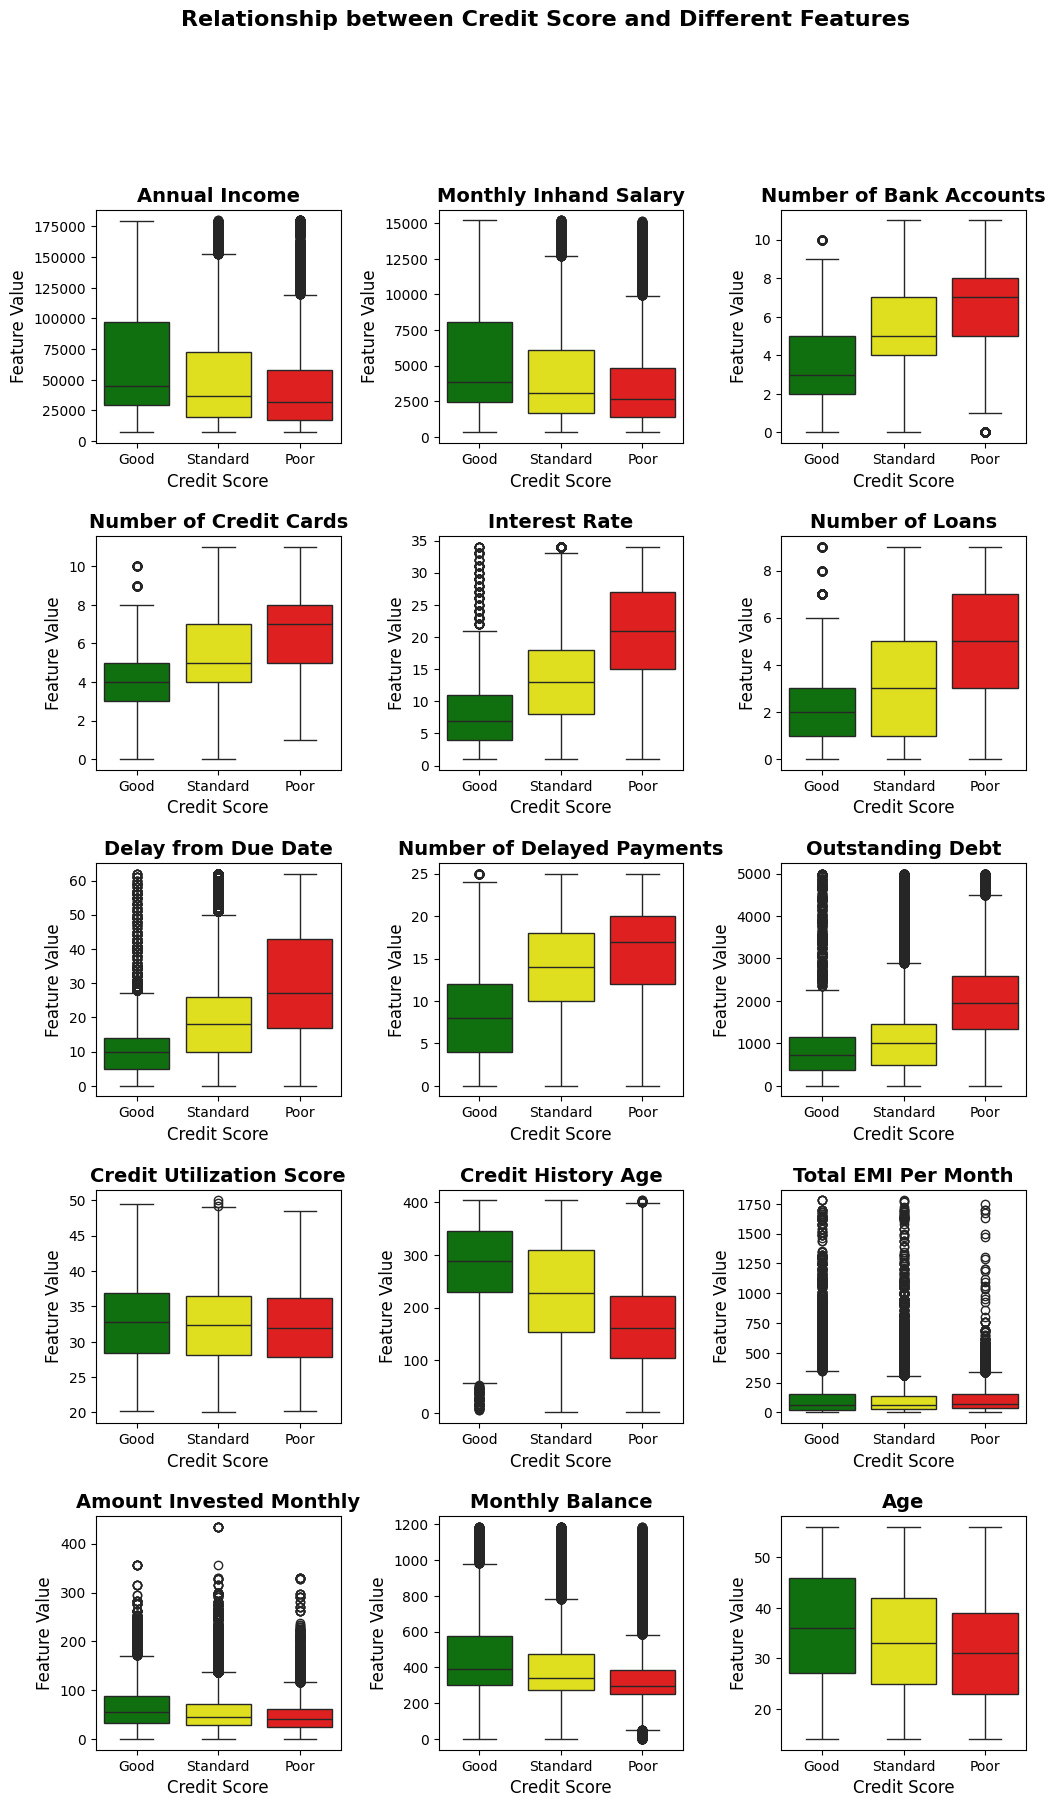

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and 5x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(12, 20))
ax = ax.flatten()  # Flatten into 1D array

# Define custom palette
palette = {"Good": "green", "Standard": "yellow", "Poor": "red"}

# Features to plot
features = [
    "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card",
    "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment",
    "Outstanding_Debt", "Credit_Utilization_Ratio", "Credit_History_Age", "Total_EMI_per_month",
    "Amount_invested_monthly", "Monthly_Balance", "Age"
]

# Titles for subplots
titles = [
    "Annual Income", "Monthly Inhand Salary", "Number of Bank Accounts", "Number of Credit Cards", 
    "Interest Rate", "Number of Loans", "Delay from Due Date", "Number of Delayed Payments",
    "Outstanding Debt", "Credit Utilization Score", "Credit History Age", "Total EMI Per Month",
    "Amount Invested Monthly", "Monthly Balance", "Age"
]

# Plot each feature with hue to fix deprecation warning
for i, feature in enumerate(features):
    sns.boxplot(
        x="Credit_Score", 
        y=feature, 
        hue="Credit_Score", 
        data=df, 
        ax=ax[i], 
        palette=palette, 
        legend=False
    )
    ax[i].set_title(titles[i], fontsize=14, fontweight="bold")
    ax[i].set_xlabel("Credit Score", fontsize=12)
    ax[i].set_ylabel("Feature Value", fontsize=12)
    ax[i].grid(color="white", linestyle="-", linewidth=2, alpha=0.5)

# Adjust spacing
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a main title
fig.suptitle("Relationship between Credit Score and Different Features", fontsize=16, fontweight="bold")

# Show the plot
plt.show()


From the 15 box plots above, we can deduce the following:

1. The more someone earns anually, the better their credit score is.
2. Similar to annual income, a higher monthly in-hand salary leads to a better credit score.
3. The ideal number of bank accounts is 2 - 4. Having more than 5 negatively affects your credit score.
4. Similar to bank accounts, having more than 5 credit cards will negatively affect your credit scores. The ideal number is 3-5.
5. 4 - 11% is the sweet spot for average instest rate. Anything above 15% is a no-no.
6. Take 1-3 loans at a time inorder to keep a good credit score. Having more than 3 loans negatively impacts credtit scores. 
7. To maintain a good credit score, you have a 5-14 day delay window. Delaying for more than 17 days affects your credit score negatively.
8. Delaying 4-12 payments from the due date is the safety window. Anything above 12 payments negatively affexts credit scores.
9. An outstanding debt of $380 – $1150 will not affect your credit scores, but going above $1338 affects your credit scores negatively.
10. Your credit utilization ratio doesn’t affect your credit scores.
11. Having a long credit history results in better credit scores.
12. The number of EMIs you are paying in a month doesn’t affect credit scores that much.
13. How much you invest monthly doesn’t really affect your credit scores. 
14. Having a high monthly balance in your account at the end of the month is good for your credit scores.
15. Credit scores tend to improve with an increase in age.

Credit Score Classification Model

The Credit_Mix column is valuable for determining credit scores as it tells about the types of credits and loans you have taken.

Since the column is categorical, let's  transform it into a numerical feature so that we can use it to train a Machine Learning model for the task of credit score classification:

In [41]:
# Before transformation
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [42]:
#Transforming the column in 0, 1, or 2.
df['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [43]:
# After transformation
df['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

In [44]:
# Importing train_test_split and splitting the data in X (features) and y(target)
from sklearn.model_selection import train_test_split

In [45]:
X = df[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age", 
        "Monthly_Balance"]].values
y = df['Credit_Score'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced')

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [50]:
# Making predictions on our model using the test data
predictions = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

        Good       0.78      0.76      0.77      5866
        Poor       0.80      0.83      0.81      9633
    Standard       0.82      0.81      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.80      0.80      0.80     33000
weighted avg       0.81      0.81      0.81     33000



Confusion Matrix [[ 4432    25  1409]
 [   21  7961  1651]
 [ 1253  2008 14240]]


Accuracy Score 0.807060606060606


Classifying customers based on their credit scores helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. A person with a good credit score will get loans from any bank and financial institution. 

I hope you liked enjoyed reading through this notebook on Credit Score Classification with Machine Learning using Python. 

Feel free to shoot me an email if you have any questions.

Thank you.